please input file name: testfile.txt
please input base: 3
please input lambda: 10000
LSE: 
Fitting line: 
0.8345332827002858x^2+
0.09314819831918818x^1+
0.04695069927346927
Total error:  22649.738493024153


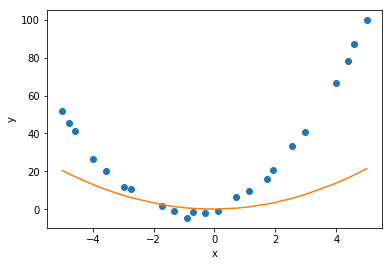

Newton's method:
Fitting line: 
3.0238533934865703x^2+
4.906190263863799x^1+
-0.2314017560877275
Total error:  26.559959499333047


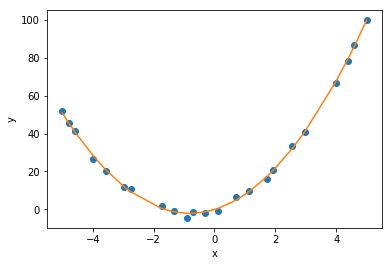

In [6]:
# library
import numpy as np
from numpy import ones
from numpy.linalg import inv
from matplotlib import pyplot as plt
import pandas as pd

# input parameter
in_file = input("please input file name: ")
f = np.loadtxt(in_file, delimiter=',')
base = input("please input base: ")
base = int(base)
lambd = input("please input lambda: ")
lambd = int(lambd)
f_pd = pd.DataFrame(f, columns=['x', 'y'])

# preprocessing A, b
A = np.zeros([len(f),base])
for i in range(len(f)):
    cnt = 0
    while cnt < base:
        A[i][cnt] = pow( f[i][0], base-cnt-1 )
        cnt += 1
b = np.zeros([len(f),1])
for i in range(len(f)):
    b[i] = f[i][1]

print("LSE: ")
# matrix operation
AT= A.transpose()
AT_dot_A = np.dot(AT, A)
AT_dot_A_plus_lambd_I = AT_dot_A
for i in range(len(AT_dot_A_plus_lambd_I)):
    AT_dot_A_plus_lambd_I[i][i] += lambd
AT_dot_b = np.dot(AT, b)

# generate L, U 
L = np.zeros([len(AT_dot_A_plus_lambd_I), len(AT_dot_A_plus_lambd_I)])
U = AT_dot_A_plus_lambd_I
for i in range(len(L)):
    L[i][i] = 1
for i in range(len(U)-1):
    for j in range(i+1, len(U)):
        scalar = U[j][i] / U[i][i]
        for k in range(len(U)):
            if k == i:
                L[j][k] = scalar
                U[j][k] = 0
            else:
                U[j][k] += U[i][k]*scalar*(-1)
# print("L", L)
# print("U", U)
#print(np.dot(L,U)) # should be close to AT_dot_A_plus_lambd_I, not the same cuz the computational error

# AT_dot_A_plus_lambd_I = LU,  inv(AT_dot_A_plus_lambd_I) = inv(U)inv(L)
# inv(U)
invU = np.zeros([len(U), len(U[0])])
tmp_U = np.copy(U)
for i in range(len(tmp_U)):
    invU[i][i] = 1
for i in range(len(tmp_U)-1, 0, -1):
    for j in range(i-1, -1, -1):
        scalar = tmp_U[j][i] / tmp_U[i][i]
        tmp_U[j][i] = 0
        for k in range(len(tmp_U)):
            invU[j][k] += invU[i][k]*scalar*(-1)
#         print("tmp_U", tmp_U)
#         print("invU", invU)
for i in range(len(tmp_U)):
    for j in range(len(tmp_U)):
        invU[i][j] /= tmp_U[i][i]
    tmp_U[i][i] = 1
# print("U", U)
# print("invU", invU)
# print("I", np.dot(U, invU))

# inv(L)
invL = np.zeros([len(L), len(L[0])])
tmp_L = np.copy(L)
for i in range(len(tmp_L)):
    invL[i][i] = 1
for i in range(len(tmp_L)):
    for j in range(i+1, len(tmp_L)):
        scalar = tmp_L[j][i]
        tmp_L[j][i] = 0
        for k in range(len(tmp_L)):
            invL[j][k] += invL[i][k]*scalar*(-1)
#         print("tmp_L", tmp_L)
#         print("invL", invL)
# print("L", L)
# print("invL", invL)
# print("I", np.dot(L, invL))
        
# calculate x
theta = np.dot(invU, invL)
theta = np.dot(theta, AT_dot_b)
print("Fitting line: ")
for i in range(len(theta)):
    if i == (len(theta)-1):
        print(theta[i][0])
    else:
        print(theta[i][0], "x^", base-i-1, '+', sep='')

# LUx = ATb , Ly = ATb
y = np.zeros([len(L[0]), len(AT_dot_b[0])])
for i in range(len(AT_dot_b)):
    y[i][0] = AT_dot_b[i][0]
    for j in range(i):
        y[i][0] -= L[i][j]*y[j][0]
#print("y", y)

# Ux = y
theta_ver2 = np.zeros([len(U[0]), len(y[0])])
for i in range(len(y)-1, -1, -1):
    theta_ver2[i][0] = y[i][0]
    for j in range(len(y)-1, i-1, -1):
        if i == j:
            theta_ver2[i][0] /= U[i][i]
        else:
            theta_ver2[i][0] -= U[i][j]*theta_ver2[j][0]
#print("theta_ver2", theta_ver2)

# LSE
LSE = 0 
for i in range(len(A)):
    sum = 0
    for j in range(base):
        sum += theta[j]*pow(f[i][0], base-j-1)
    LSE += pow(sum - f[i][1], 2)
print("Total error: ", LSE[0])

# visualization
def curve(x, theta, base):
    sum =0
    for i in range(base):
        sum += theta[base-i-1]*x**i
    return sum

plt.plot(f_pd['x'], f_pd['y'], 'o', label="data") 
plt.plot(f_pd['x'], curve(f_pd['x'],theta, base))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
######### above no problem #################
# Newton's method
print("Newton's method:")
AT_dot_A = np.dot(AT, A)

# generate L, U 
L = np.zeros([len(AT_dot_A), len(AT_dot_A)])
U = AT_dot_A
for i in range(len(L)):
    L[i][i] = 1
for i in range(len(U)-1):
    for j in range(i+1, len(U)):
        scalar = U[j][i] / U[i][i]
        for k in range(len(U)):
            if k == i:
                L[j][k] = scalar
                U[j][k] = 0
            else:
                U[j][k] += U[i][k]*scalar*(-1)
# print("L", L)
# print("U", U)
#print(np.dot(L,U)) # should be close to AT_dot_A_plus_lambd_I, not the same cuz the computational error

# AT_dot_A = LU,  inv(AT_dot_A) = inv(U)inv(L)
# inv(U)
invU = np.zeros([len(U), len(U[0])])
tmp_U = np.copy(U)
for i in range(len(tmp_U)):
    invU[i][i] = 1
for i in range(len(tmp_U)-1, 0, -1):
    for j in range(i-1, -1, -1):
        scalar = tmp_U[j][i] / tmp_U[i][i]
        tmp_U[j][i] = 0
        for k in range(len(tmp_U)):
            invU[j][k] += invU[i][k]*scalar*(-1)
#         print("tmp_U", tmp_U)
#         print("invU", invU)
for i in range(len(tmp_U)):
    for j in range(len(tmp_U)):
        invU[i][j] /= tmp_U[i][i]
    tmp_U[i][i] = 1
# print("U", U)
# print("invU", invU)
# print("I", np.dot(U, invU))

# inv(L)
invL = np.zeros([len(L), len(L[0])])
tmp_L = np.copy(L)
for i in range(len(tmp_L)):
    invL[i][i] = 1
for i in range(len(tmp_L)):
    for j in range(i+1, len(tmp_L)):
        scalar = tmp_L[j][i]
        tmp_L[j][i] = 0
        for k in range(len(tmp_L)):
            invL[j][k] += invL[i][k]*scalar*(-1)
            
# calculate x
theta = np.dot(invU, invL)
theta = np.dot(theta, AT_dot_b)
print("Fitting line: ")
for i in range(len(theta)):
    if i == (len(theta)-1):
        print(theta[i][0])
    else:
        print(theta[i][0], "x^", base-i-1, '+', sep='')

# LSE
LSE = 0 
for i in range(len(A)):
    sum = 0
    for j in range(base):
        sum += theta[j]*pow(f[i][0], base-j-1)
    LSE += pow(sum - f[i][1], 2)
print("Total error: ", LSE[0])

# visualization
plt.plot(f_pd['x'], f_pd['y'], 'o', label="data") 
plt.plot(f_pd['x'], curve(f_pd['x'],theta, base))
plt.xlabel('x')
plt.ylabel('y')
plt.show()